In [ ]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from keras import optimizers
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import load_model

In [ ]:
input=np.loadtxt('CrossedGrid_InputData_1.csv')
output=np.loadtxt('NEW-CrossedGrid_OutputData_1.csv')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(input,output,test_size=0.33)


scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
#Model
model=Sequential()
model.add(Dense(4))
model.add(Dense(18))
model.add(tf.keras.layers.LeakyReLU(alpha=-100))
model.add(Dense(18))
model.add(tf.keras.layers.LeakyReLU(alpha=-100))
model.add(Dense(18))
model.add(tf.keras.layers.LeakyReLU(alpha=-100))
model.add(Dense(18))
model.add(Dense(18))
model.add(Dense(18))
model.add(Dense(18))
model.add(Dense(18))
#model=load_model('UROP_model.h5')

In [ ]:

model.compile(loss='mean_squared_error',optimizer='adamax',metrics=['accuracy'])

def lr_scheduler(epoch, lr):
    decay_rate = 0.75
    decay_step = 2000
    if epoch % decay_step == 0 and epoch:
        return lr * decay_rate
    return lr



lr_scheduler = [tf.keras.callbacks.LearningRateScheduler(lr_scheduler, verbose=1)]

model.fit(x=x_train,y=y_train,batch_size=5000,epochs=int(2e+4), validation_data=(x_test,y_test),callbacks=[lr_scheduler])
#model.fit(x=x_train,y=y_train,batch_size=4000,epochs=int(3e+3), validation_data=(x_test,y_test))



Streaming output truncated to the last 5000 lines.
Epoch 18751/20000

Epoch 18751: LearningRateScheduler setting learning rate to 7.508468115702271e-05.
1/1 [==============================] - 0s 36ms/step - loss: 106833352.0000 - accuracy: 0.9737 - val_loss: 110475360.0000 - val_accuracy: 0.9733
Epoch 18752/20000

Epoch 18752: LearningRateScheduler setting learning rate to 7.508468115702271e-05.
1/1 [==============================] - 0s 41ms/step - loss: 106829864.0000 - accuracy: 0.9737 - val_loss: 110494256.0000 - val_accuracy: 0.9733
Epoch 18753/20000

Epoch 18753: LearningRateScheduler setting learning rate to 7.508468115702271e-05.
1/1 [==============================] - 0s 41ms/step - loss: 106825800.0000 - accuracy: 0.9737 - val_loss: 110488896.0000 - val_accuracy: 0.9733
Epoch 18754/20000

Epoch 18754: LearningRateScheduler setting learning rate to 7.508468115702271e-05.
1/1 [==============================] - 0s 37ms/step - loss: 106821928.0000 - accuracy: 0.9741 - val_loss: 110

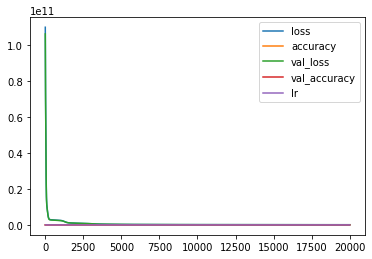

In [ ]:
losses=pd.DataFrame(model.history.history)
losses.plot()

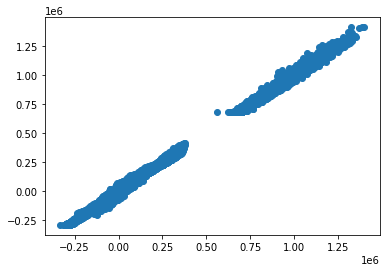

In [ ]:
x=scaler.transform(input)

predictions=model.predict(x)

plt.scatter(predictions,output)

In [ ]:
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=1000)
print("test loss, test accuracy:", results)

Evaluate on test data
2/2 [==============================] - 0s 10ms/step - loss: 106954008.0000 - accuracy: 0.9741
test loss, test accuracy: [106954008.0, 0.9740890860557556]
